# Using the wombats Wrapper for Minigrid Gym Environments

In [1]:
import gym
from IPython.display import Video

from wombats.systems import (StaticMinigridTSWrapper,
                             LavaComparison_noDryingOff)
from wombats.automaton import active_automata
from wombats.automaton import MinigridTransitionSystem

## Creating the Environment

We start by creating a gym environment (can be wrapped):

In [2]:
# ENV_ID = 'MiniGrid-LavaComparison_noDryingOff-v0'
# ENV_ID = 'MiniGrid-DistShift1-v0'
ENV_ID = 'MiniGrid-LavaGapS5-v0'
env = gym.make(ENV_ID)

Now that we have a regular Minigrid environment, we can wrap it with the wombats® minigrid wrapper to extract the abstraction of the environment.

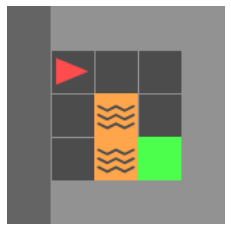

In [3]:
env = StaticMinigridTSWrapper(env)
env.render_notebook()

## Creating the Transition System Representation

Now that we have wrapped the environemt in our wrapper, we can build a transition system out of the wrapped minigrid environment.

Note that the TS and the Minigrid environment will be kept in sync

In [4]:
minigrid_TS = active_automata.get(automaton_type='TS', graph_data=env,
                                  graph_data_format='minigrid')

Now that we created a transition system representation for the Minigrid env, we can visualize the underlying transition system. **WARNING: the transition system will be extremely large when drawn for most grid environments of any reasonable size.**

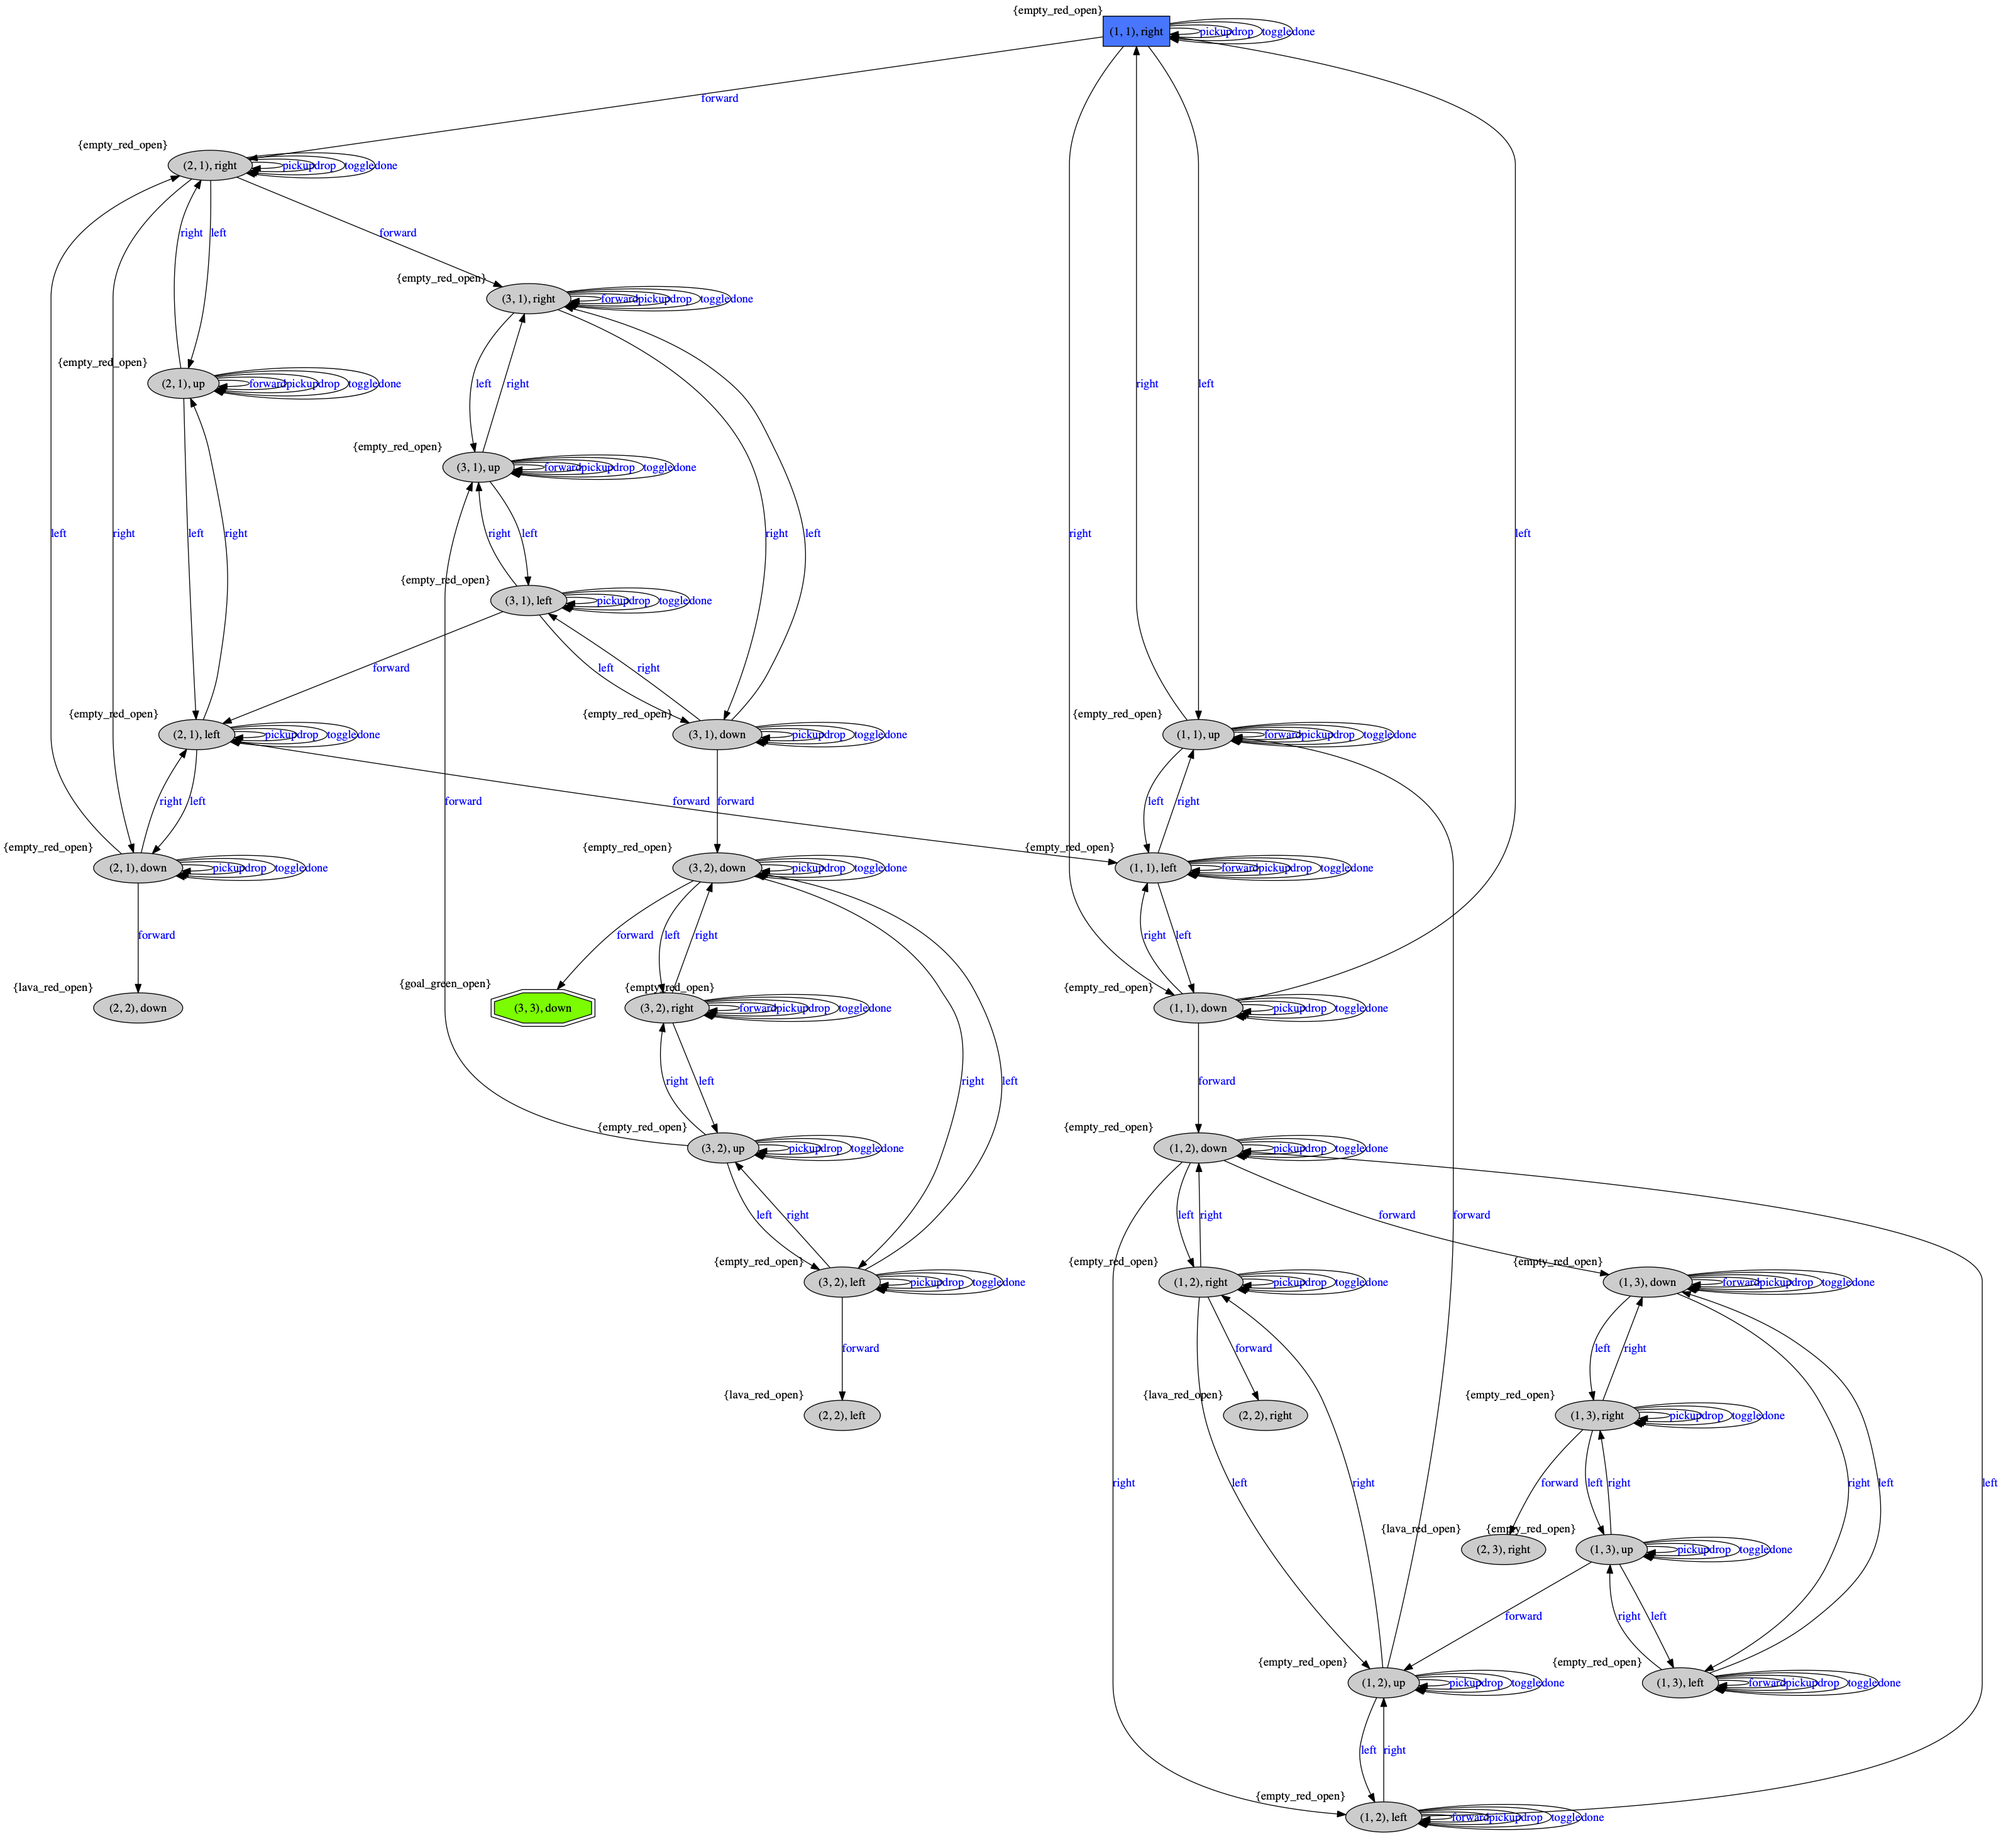

In [5]:
minigrid_TS.draw('_'.join([ENV_ID, 'TS']))

### Using the Transition System Representation

We can feed an environment action into the transition system and make the step in both the transition system and the gym environment:

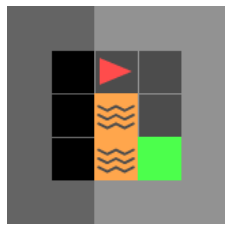

(2, 1), right empty_red_open


In [6]:
actions = minigrid_TS.actions
next_state, observation = minigrid_TS.transition(minigrid_TS.current_state,
                                                 input_symbol=actions.forward,
                                                 show_steps=True)
print(next_state, observation)

or we feed the TS one of its symbols and make a step in both the transition system and the gym environment:

In [7]:
minigrid_TS.symbols

{'done', 'drop', 'forward', 'left', 'pickup', 'right', 'toggle'}

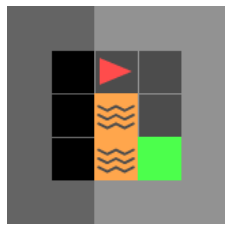

(2, 1), right empty_red_open


In [8]:
minigrid_TS.reset()
next_state, observation = minigrid_TS.transition(minigrid_TS.current_state,
                                                 input_symbol='forward',
                                                 show_steps=True)
print(next_state, observation)

We can also compute a run on the TS, again using either `env` actions or TS symbols, to compute an output string and the sequence of visited states:

In [9]:
controls = {}
controls['MiniGrid-LavaComparison_noDryingOff-v0'] = [actions.left,
                                                      actions.forward, 
                                                      actions.forward, 
                                                      actions.forward,
                                                      actions.forward,
                                                      actions.left,
                                                      actions.forward,
                                                      actions.forward]
controls['MiniGrid-DistShift1-v0'] = [actions.forward, actions.right, 
                                      actions.forward, actions.forward,
                                      actions.left, actions.forward,
                                      actions.forward, actions.forward,
                                      actions.forward, actions.left,
                                      actions.forward, actions.forward,
                                      actions.right, actions.forward]
controls['MiniGrid-LavaGapS5-v0'] = [actions.forward, actions.forward, 
                                     actions.right, actions.forward,
                                     actions.forward]

output_string, visited_states, video_path = minigrid_TS.run(controls[ENV_ID],
                                                            record_video=True)
print(output_string)
print(visited_states)
Video(video_path, embed=True, html_attributes="controls muted autoplay loop")

['empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'goal_green_open']
['(1, 1), right', '(2, 1), right', '(3, 1), right', '(3, 1), down', '(3, 2), down', '(3, 3), down']
